# Warning : 
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
!wget http://webia.lip6.fr/~dancette/deep-learning/assets/TP3-4/TP3-4.zip
!unzip -j TP3-4.zip

--2021-10-24 13:26:56--  http://webia.lip6.fr/~dancette/deep-learning/assets/TP3-4/TP3-4.zip
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13421167 (13M) [application/zip]
Saving to: ‘TP3-4.zip’

TP3-4.zip           100%[===================>]  12.80M  11.1MB/s    in 1.2s    

2021-10-24 13:26:57 (11.1 MB/s) - ‘TP3-4.zip’ saved [13421167/13421167]

Archive:  TP3-4.zip
  inflating: tme5.py                 
  inflating: mnist.mat               
  inflating: circles.py              
  inflating: circles.mat             


In [2]:
import math
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%run 'tme5.py'

# Part 1 : Forward and backward passes "by hands"

In [12]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    
    #params["Wh"] = torch.normal(0, 0.3, size=(nh, nx))
    #params["Wy"] = torch.normal(0, 0.3, size=(ny, nh))
    params["Wh"] = torch.randn(nh,nx)
    params["Wy"] = torch.randn(ny,nh)
    params["bh"] = torch.randn(nh)
    params["by"] = torch.randn(ny)

    ####################
    ##      END        #
    ####################
    return params

In [4]:
def softmax(X):
    # sortie en batch d'== d
    s = torch.sum(torch.exp(X),dim = 1) 
    s = s.view(-1, 1)
    res = torch.exp(X)/s
    return res

In [5]:
def forward(params, X):
    """
    params: dictionnary
    X: (n_batch, dimension)
    """
    bsize = X.size(0)
    nh = params['Wh'].size(0)
    ny = params['Wy'].size(0)
    outputs = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for X, htilde, h, ytilde, yhat
    
    outputs["X"] = X
    outputs["htilde"] = torch.mm(outputs["X"], params["Wh"].T) + params["bh"]
    outputs["h"] = torch.tanh(outputs["htilde"])
    outputs["ytilde"] = torch.mm(outputs["h"], params["Wy"].T) + params["by"]
    outputs["yhat"] = softmax(outputs["ytilde"])
    
    ####################
    ##      END        #
    ####################

    return outputs['yhat'], outputs

In [6]:
def loss_accuracy(Yhat, Y):

    #####################
    ## Your code here  ##
    #####################

    L = -torch.mean(torch.sum(Y*torch.log(Yhat)))
    _, indsY = torch.max (Y, 1)
    _, indsYhat = torch.max (Yhat, 1)
    acc=torch.where(indsY==indsYhat,1,0).sum()/Y.shape[0]
   
    ####################
    ##      END        #
    ####################

    return L, acc

In [7]:
def backward(params, outputs, Y):
    bsize = Y.shape[0]
    grads = {}

    #####################
    ## Your code here  ##
    #####################
    # fill values for Wy, Wh, by, bh

    grad_Ytilde = (outputs['yhat']-Y)/bsize
    grad_Htilde = (torch.mm(grad_Ytilde, params['Wy'])*(1-outputs["h"]))/bsize
    grads["Wy"] = (torch.mm(grad_Ytilde.T, outputs["h"]))/bsize
    grads["Wh"] = (torch.mm(grad_Htilde.T,outputs['X']))/bsize
    grads["by"] = (torch.sum(grad_Ytilde, dim=0).T)
    grads["bh"] = (torch.sum(grad_Htilde, dim=0).T)
    
    ####################
    ##      END        #
    ####################
    return grads

In [8]:
def sgd(params, grads, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the params values

    params["Wh"] -=  eta * grads['Wh']
    params["Wy"] -=  eta * grads['Wy']
    params["bh"] -=  eta * grads['bh']
    params["by"] -=  eta * grads['by']

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure "by hands"

In [13]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, backward, sgd
        Yhat, outputs = forward(params, X)
        loss, acc = loss_accuracy(Yhat, Y)
        grads = backward (params, outputs, Y)
        params = sgd(params, grads, eta)

    ####################
    ##      END        #
    ####################

    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    data.plot_data_with_grid(Ygrid, title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Part 2 : Simplification of the backward pass with `torch.autograd`



In [17]:
def init_params(nx, nh, ny):
    """
    nx, nh, ny: integers
    out params: dictionnary
    """
    params = {}
    
    #####################
    ## Your code here  ##
    #####################
    # fill values for Wh, Wy, bh, by
    # activaye autograd on the network weights
    
    params["Wh"] = torch.normal(0, 0.3, size=(nh, nx), requires_grad=True)
    params["Wy"] = torch.normal(0, 0.3, size=(ny, nh), requires_grad=True)
    params["bh"] = torch.randn(nh, requires_grad=True)
    params["by"] = torch.randn(ny, requires_grad=True)

    ####################
    ##      END        #
    ####################
    return params

The function `forward` remains unchanged from previous part. 

The function `backward` is no longer used because of "autograd". 

In [18]:
def sgd(params, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators

    with torch.no_grad() :
      params["Wh"] -= eta * params["Wh"].grad
      params["Wy"] -= eta * params["Wy"].grad
      params["bh"] -= eta * params["bh"].grad
      params["by"] -= eta * params["by"].grad  
      params['Wh'].grad.zero_()  
      params['Wy'].grad.zero_()
      params['bh'].grad.zero_()
      params['by'].grad.zero_()

    ####################
    ##      END        #
    ####################
    return params

## Global learning procedure with autograd

In [19]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

params = init_params(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

  
        # write the optimization algorithm on the batch (X,Y)
        # using the functions: forward, loss_accuracy, sgd
        # and the backward function with autograd


        Yhat, outputs = forward(params, X)
        loss, acc = loss_accuracy(Yhat, Y)
        loss.backward()
        params = sgd(params, eta)
        

    ####################
    ##      END        #
    ####################


    Yhat_train, _ = forward(params, data.Xtrain)
    Yhat_test, _ = forward(params, data.Xtest)
    Ltrain, acctrain = loss_accuracy(Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(Yhat_test, data.Ytest)
    Ygrid, _ = forward(params, data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title)
    # detach() is used to remove the predictions from the computational graph in autograd
    data.plot_data_with_grid(Ygrid.detach(), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Part 3 : Simplification of the forward pass with `torch.nn`

`init_params` and `forward` are replaced by the `init_model` function which defines the network architecture and the loss.

In [110]:
def init_model(nx, nh, ny):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny)#,
        #torch.nn.Softmax()
    )
    loss = torch.nn.CrossEntropyLoss()

    ####################
    ##      END        #
    ####################

    return model, loss

In [109]:
def loss_accuracy(loss, Yhat, Y):

    #####################
    ## Your code here  ##
    #####################
    # call the loss function

      Y_ = torch.max(Y,1)[1]
      L = loss(Yhat,Y_)
    _, indsY = torch.max (Y, 1)
    _, indsYhat = torch.max (Yhat, 1)
    acc=torch.where(indsY==indsYhat,1,0).sum()/Y.shape[0]

    ####################
    ##      END        #
    ####################

    return L, acc

In [107]:
def sgd(model, eta):

    #####################
    ## Your code here  ##
    #####################
    # update the network weights
    # warning: use torch.no_grad()
    # and reset to zero the gradient accumulators
    with torch.no_grad():
      for param in model.parameters():
        param -= eta * param.grad
      model.zero_grad()

    ####################
    ##      END        #
    ####################
    return model

## Global learning procedure with autograd and `torch.nn`

In [111]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss = init_model(nx, nh, ny)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code here  ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]

        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy, sgd
        # the forward with the predict method from the model
        # and the backward function with autograd

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        L.backward()
        model = sgd(model, eta)

    ####################
    ##      END        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [93]:
#TESTS
j=0
Nbatch = 10
indsBatch = range(j * Nbatch, (j+1) * Nbatch)
model, loss = init_model(nx, nh, ny)
X = Xtrain[indsBatch, :]
Y = Ytrain[indsBatch, :]

Yhat = model(X)
print(torch.max(Y,1)[1])
print(torch.max(Yhat,1)[1])
Y_ = torch.max(Y,1)[1]
loss(Yhat, Y_)

tensor([0, 0, 1, 1, 0, 1, 0, 0, 0, 1])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


tensor(0.7035, grad_fn=<NllLossBackward>)

# Part 4 : Simplification of the SGD with `torch.optim`

In [114]:
def init_model(nx, nh, ny, eta):

    #####################
    ## Your code here  ##
    #####################

    model = torch.nn.Sequential(
        torch.nn.Linear(nx, nh),
        torch.nn.Tanh(),
        torch.nn.Linear(nh, ny)
    )
    loss = torch.nn.CrossEntropyLoss()
    optim = torch.optim.SGD(model.parameters(), lr=eta)

    ####################
    ##      END        #
    ####################

    return model, loss, optim

The `sgd` function is replaced by calling the `optim.zero_grad()` before the backward and `optim.step()` after. 

## Algorithme global d'apprentissage (avec autograd, les couches `torch.nn` et `torch.optim`)

In [104]:
# init
data = CirclesData()
data.plot_data()
N = data.Xtrain.shape[0]
Nbatch = 10
nx = data.Xtrain.shape[1]
nh = 10
ny = data.Ytrain.shape[1]
eta = 0.03

model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        optim.zero_grad()
        L.backward()
        optim.step()


    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)
    Ygrid = model(data.Xgrid)  

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 
    data.plot_data_with_grid(torch.nn.Softmax(dim=1)(Ygrid.detach()), title)

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Part 5 : MNIST

Apply the code from previous part code to the MNIST dataset.

In [112]:
# init
data = MNISTData()
N = data.Xtrain.shape[0]
Nbatch = 100
nx = data.Xtrain.shape[1]
nh = 100
ny = data.Ytrain.shape[1]
eta = 0.03

Iter 0: Acc train 0.8% (0.55), acc test 0.9% (0.53)
Iter 1: Acc train 0.9% (0.46), acc test 0.9% (0.45)
Iter 2: Acc train 0.9% (0.45), acc test 0.9% (0.44)
Iter 3: Acc train 0.9% (0.42), acc test 0.9% (0.40)
Iter 4: Acc train 0.9% (0.50), acc test 0.9% (0.48)
Iter 5: Acc train 0.9% (0.44), acc test 0.9% (0.43)
Iter 6: Acc train 0.9% (0.40), acc test 0.9% (0.38)
Iter 7: Acc train 0.9% (0.43), acc test 0.9% (0.42)
Iter 8: Acc train 0.9% (0.42), acc test 0.9% (0.41)
Iter 9: Acc train 0.9% (0.41), acc test 0.9% (0.41)
Iter 10: Acc train 0.9% (0.41), acc test 0.9% (0.40)
Iter 11: Acc train 0.9% (0.38), acc test 0.9% (0.38)
Iter 12: Acc train 0.9% (0.41), acc test 0.9% (0.41)
Iter 13: Acc train 0.9% (0.39), acc test 0.9% (0.38)
Iter 14: Acc train 0.9% (0.37), acc test 0.9% (0.36)
Iter 15: Acc train 0.9% (0.38), acc test 0.9% (0.38)
Iter 16: Acc train 0.9% (0.37), acc test 0.9% (0.35)
Iter 17: Acc train 0.9% (0.41), acc test 0.9% (0.39)
Iter 18: Acc train 0.9% (0.38), acc test 0.9% (0.37)
Ite

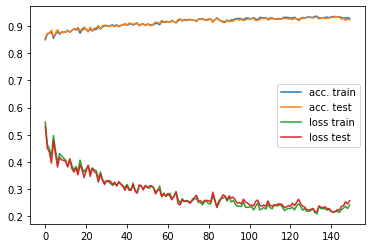

In [117]:
model, loss, optim = init_model(nx, nh, ny, eta)

curves = [[],[], [], []]

# epoch
for iteration in range(150):

    # permute
    perm = np.random.permutation(N)
    Xtrain = data.Xtrain[perm, :]
    Ytrain = data.Ytrain[perm, :]

    #####################
    ## Your code  here ##
    #####################
    # batches
    for j in range(N // Nbatch):

        indsBatch = range(j * Nbatch, (j+1) * Nbatch)
        X = Xtrain[indsBatch, :]
        Y = Ytrain[indsBatch, :]
  
        # write the optimization algorithm on the batch (X,Y)
        # using the functions: loss_accuracy
        # the forward with the predict method from the model
        # the backward function with autograd
        # and then an optimization step

        Yhat = model(X)
        L, acc = loss_accuracy(loss, Yhat, Y)
        optim.zero_grad()
        L.backward()
        optim.step()


    ####################
    ##      FIN        #
    ####################


    Yhat_train = model(data.Xtrain)
    Yhat_test = model(data.Xtest)
    Ltrain, acctrain = loss_accuracy(loss, Yhat_train, data.Ytrain)
    Ltest, acctest = loss_accuracy(loss, Yhat_test, data.Ytest)

    title = 'Iter {}: Acc train {:.1f}% ({:.2f}), acc test {:.1f}% ({:.2f})'.format(iteration, acctrain, Ltrain, acctest, Ltest)
    print(title) 

    curves[0].append(acctrain)
    curves[1].append(acctest)
    curves[2].append(Ltrain)
    curves[3].append(Ltest)

fig = plt.figure()
plt.plot(curves[0], label="acc. train")
plt.plot(curves[1], label="acc. test")
plt.plot(curves[2], label="loss train")
plt.plot(curves[3], label="loss test")
plt.legend()
plt.show()

# Part 6: Bonus: SVM


Train a SVM model on the Circles dataset.

Ideas : 
- First try a linear SVM (sklearn.svm.LinearSVC dans scikit-learn). Does it work well ? Why ?
- Then try more complex kernels (sklearn.svm.SVC). Which one is the best ? why ?
- Does the parameter C of regularization have an impact? Why ?

In [ ]:
# data
data = CirclesData()
Xtrain = data.Xtrain.numpy()
Ytrain = data.Ytrain[:, 0].numpy()

Xgrid = data.Xgrid.numpy()

Xtest = data.Xtest.numpy()
Ytest = data.Ytest[:, 0].numpy()

def plot_svm_predictions(data, predictions):
      plt.figure(2)
      plt.clf()
      plt.imshow(np.reshape(predictions, (40,40)))
      plt.plot(data._Xtrain[data._Ytrain[:,0] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,0] == 1,1]*10+20, 'bo', label="Train")
      plt.plot(data._Xtrain[data._Ytrain[:,1] == 1,0]*10+20, data._Xtrain[data._Ytrain[:,1] == 1,1]*10+20, 'ro')
      plt.plot(data._Xtest[data._Ytest[:,0] == 1,0]*10+20, data._Xtest[data._Ytest[:,0] == 1,1]*10+20, 'b+', label="Test")
      plt.plot(data._Xtest[data._Ytest[:,1] == 1,0]*10+20, data._Xtest[data._Ytest[:,1] == 1,1]*10+20, 'r+')
      plt.xlim(0,39)
      plt.ylim(0,39)
      plt.clim(0.3,0.7)
      plt.draw()
      plt.pause(1e-3)

In [ ]:
import sklearn.svm

############################
### Your code here   #######
### Train the SVM    #######
## See https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
## and https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
############################

svm = None

###########################

In [ ]:
## Print results

Ytest_pred = svm.predict(Xtest)
accuracy = np.sum(Ytest == Ytest_pred) / len(Ytest)
print(f"Accuracy : {100 * accuracy:.2f}")
Ygrid_pred = svm.predict(Xgrid)
plot_svm_predictions(data, Ygrid_pred)